In [1]:
#Importing Libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Importing neccessary libraries for Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

#Importing neccesary libraries for Evaluation and Tuning

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix
from joblib import dump,load


### Heart Disease Data Dictionary

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [2]:
heart=pd.read_csv("11.2 heart-disease.csv")

In [3]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
heart.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

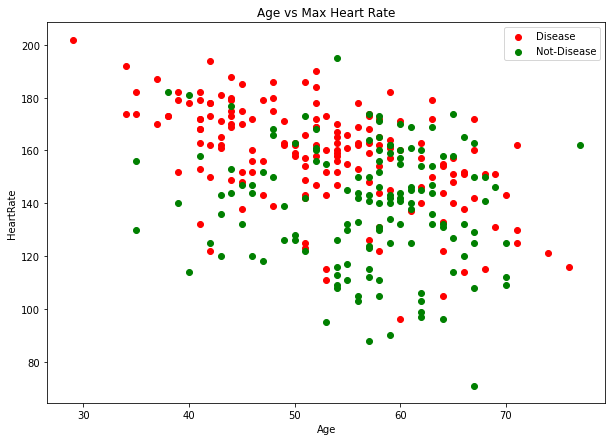

In [5]:
fig,ax=plt.subplots(figsize=(10,7))
ax.scatter(heart['age'][heart['target']==1],heart['thalach'][heart['target']==1],label='Disease',c='red')
ax.scatter(heart['age'][heart['target']==0],heart['thalach'][heart['target']==0],label='Not-Disease',c='green')
ax.legend()
ax.set(title='Age vs Max Heart Rate',xlabel='Age',ylabel='HeartRate');

In [6]:
heart.groupby(['sex','target'])['target'].count().unstack()

target,0,1
sex,,
0,24,72
1,114,93


<AxesSubplot:xlabel='sex'>

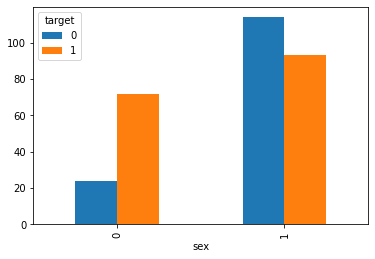

In [7]:
pd.crosstab(heart['sex'],heart['target']).plot(kind='bar')

In [8]:
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


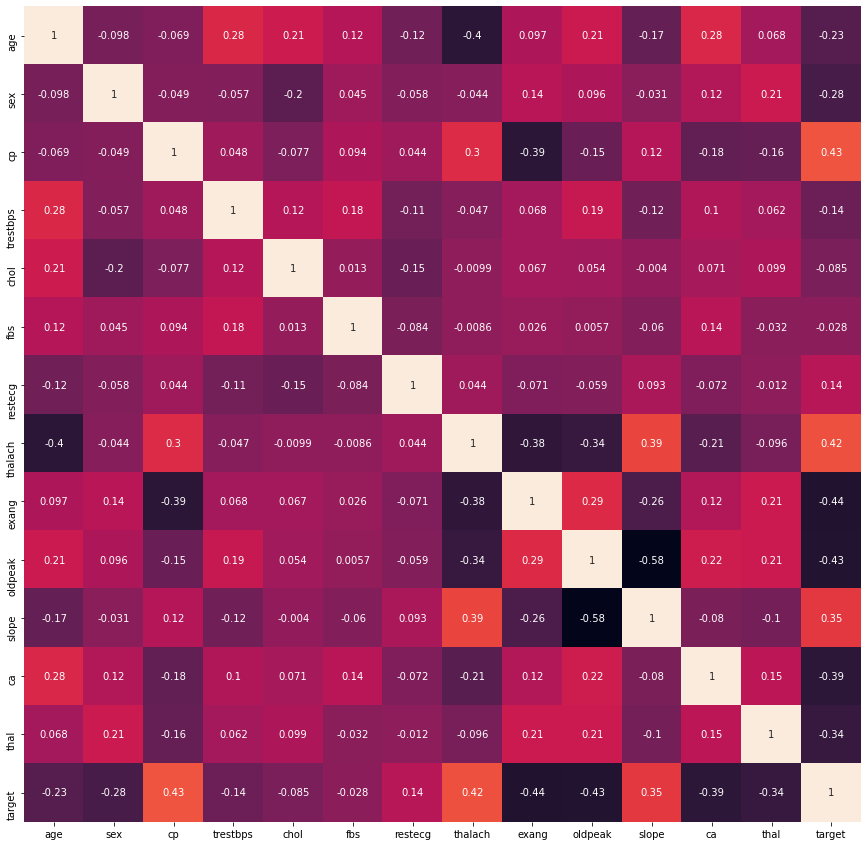

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(heart.corr(),annot=True,cbar=False);

<AxesSubplot:xlabel='cp'>

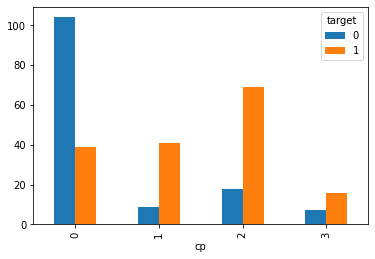

In [10]:
pd.crosstab(heart['cp'],heart['target']).plot(kind='bar')

In [11]:
df=heart.copy()

In [12]:
X=df.drop('target',axis=1)

In [13]:
Y=df['target']

In [14]:
np.random.seed(42)
scaler=StandardScaler()
X=scaler.fit_transform(X)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

knn=KNeighborsClassifier()
lr=LogisticRegression()
rfc=RandomForestClassifier(n_jobs=-1)

knn.fit(x_train,y_train),lr.fit(x_train,y_train),rfc.fit(x_train,y_train)
print('The accuracy of the KNearest is :{:.2f}%, Logistic Regression is :{:.2f}%, RandomForestClassifier is :{:.2f}%'.format(knn.score(x_test,y_test)*100,lr.score(x_test,y_test)*100,rfc.score(x_test,y_test)*100))

The accuracy of the KNearest is :91.80%, Logistic Regression is :85.25%, RandomForestClassifier is :85.25%


In [15]:
def cross_val(estimator,features,label,cross_val,score):
    np.random.seed(42)
    score=np.mean(cross_val_score(estimator=estimator,X=features,y=label,cv=cross_val,scoring=score))
    return score
    

In [16]:
cross_val(lr,X,Y,10,'accuracy')

0.8116129032258066

In [17]:
cross_val(rfc,X,Y,10,'accuracy')

0.8248387096774193

In [18]:
cross_val(knn,X,Y,10,'accuracy')

0.8183870967741935

In [19]:
#Creating helper function for evaluating scoring metrics
def eval(y_true,est):
    scores={'accuracy':accuracy_score(y_true,est.predict(x_test)),
            'recall':recall_score(y_true,est.predict(x_test)),
            'f1':f1_score(y_true,est.predict(x_test)),
            'precision':precision_score(y_true,est.predict(x_test))
           }
    return scores

In [20]:
performance=pd.DataFrame({'Logistic_Regression':eval(y_test,lr),'RandomForest':eval(y_test,rfc),'KNeighbour':eval(y_test,knn)})

In [21]:
performance

,Logistic_Regression,RandomForest,KNeighbour
accuracy,0.852459,0.852459,0.918033
recall,0.843750,0.875000,0.906250
f1,0.857143,0.861538,0.920635
precision,0.870968,0.848485,0.935484


<AxesSubplot:>

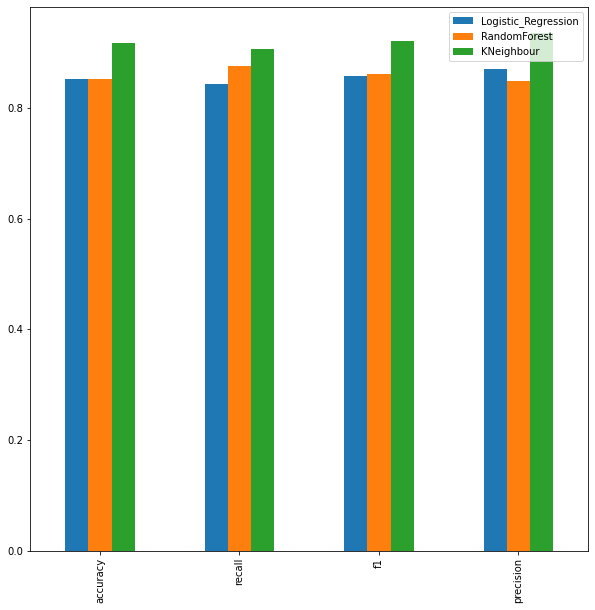

In [22]:
performance.plot(kind='bar',figsize=(10,10))

In [113]:
baseline=pd.Series({'KNeighbor':cross_val(knn,X,Y,10,'accuracy'),'RandomForest':cross_val(rfc,X,Y,10,'accuracy'),'LinearRegression':cross_val(lr,X,Y,10,'accuracy')})

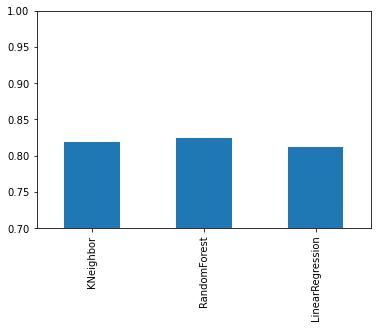

In [116]:
baseline.plot(kind='bar',ylim=[0.7,1.0]);

In [23]:
def confusion_mat(y_true,est):
    conf=confusion_matrix(y_true,est.predict(x_test))
    return conf
    

Text(704.8235294117648, 0.5, 'Actual')

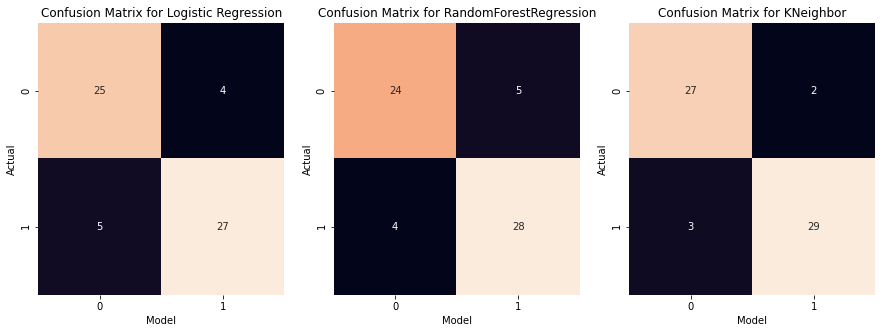

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.heatmap(confusion_mat(y_test,lr),annot=True,cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Model')
plt.ylabel('Actual')
plt.subplot(1,3,2)
sns.heatmap(confusion_mat(y_test,rfc),annot=True,cbar=False)
plt.title('Confusion Matrix for RandomForestRegression')
plt.xlabel('Model')
plt.ylabel('Actual')
plt.subplot(1,3,3)
sns.heatmap(confusion_mat(y_test,knn),annot=True,cbar=False)
plt.title('Confusion Matrix for KNeighbor')
plt.xlabel('Model')
plt.ylabel('Actual')



## Lets use Hyperparameter tuning to improve ModelPerformance

In [42]:
grid_rfc={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

grid_lr= {'penalty' : ['l1', 'l2'],
          'C' : np.logspace(-4, 4, 20),
          'solver' : ['liblinear']}

grid_knn={'leaf_size' : np.arange(1,10,1),
          'n_neighbors' : np.arange(1,10,1),
           'p':[1,2]}

In [45]:
np.random.seed(42)
lr_rand=RandomizedSearchCV(lr,n_iter=20,param_distributions=grid_lr,cv=5,verbose=2)

In [48]:
%%time
np.random.seed(42)
lr_rand.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l2, sol

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   verbose=2)

In [49]:
lr_rand.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 29.763514416313132}

In [50]:
np.random.seed(42)
rfc_rand=RandomizedSearchCV(rfc,n_iter=20,param_distributions=grid_rfc,cv=5,verbose=2)

In [51]:
%%time
np.random.seed(42)
rfc_rand.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   3.8s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.7s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.7s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.7s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.6s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1600; total time=   1.0s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_e

[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_featu

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [52]:
rfc_rand.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': True}

In [53]:
np.random.seed(42)
knn_rand=RandomizedSearchCV(knn,n_iter=20,param_distributions=grid_knn,cv=5,verbose=2)

In [54]:
%%time
np.random.seed(42)
knn_rand.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ....................leaf_size=9, n_neighbors=8, p=1; total time=   0.0s
[CV] END ....................leaf_size=9, n_neighbors=8, p=1; total time=   0.0s
[CV] END ....................leaf_size=9, n_neighbors=8, p=1; total time=   0.0s
[CV] END ....................leaf_size=9, n_neighbors=8, p=1; total time=   0.0s
[CV] END ....................leaf_size=9, n_neighbors=8, p=1; total time=   0.0s
[CV] END ....................leaf_size=7, n_neighbors=1, p=2; total time=   0.0s
[CV] END ....................leaf_size=7, n_neighbors=1, p=2; total time=   0.0s
[CV] END ....................leaf_size=7, n_neighbors=1, p=2; total time=   0.0s
[CV] END ....................leaf_size=7, n_neighbors=1, p=2; total time=   0.0s
[CV] END ....................leaf_size=7, n_neighbors=1, p=2; total time=   0.0s
[CV] END ....................leaf_size=8, n_neighbors=3, p=2; total time=   0.0s
[CV] END ....................leaf_size=8, n_nei

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'leaf_size': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'p': [1, 2]},
                   verbose=2)

In [56]:
knn_rand.best_params_

{'p': 1, 'n_neighbors': 5, 'leaf_size': 6}

In [57]:
eval(y_test,lr_rand)

{'accuracy': 0.8524590163934426,
 'recall': 0.84375,
 'f1': 0.8571428571428571,
 'precision': 0.8709677419354839}

In [59]:
Performance_RandCV=pd.DataFrame({'Logistic_Regression':eval(y_test,lr_rand),'KNeighbour':eval(y_test,knn_rand),'RandomForest':eval(y_test,rfc_rand)})

<AxesSubplot:>

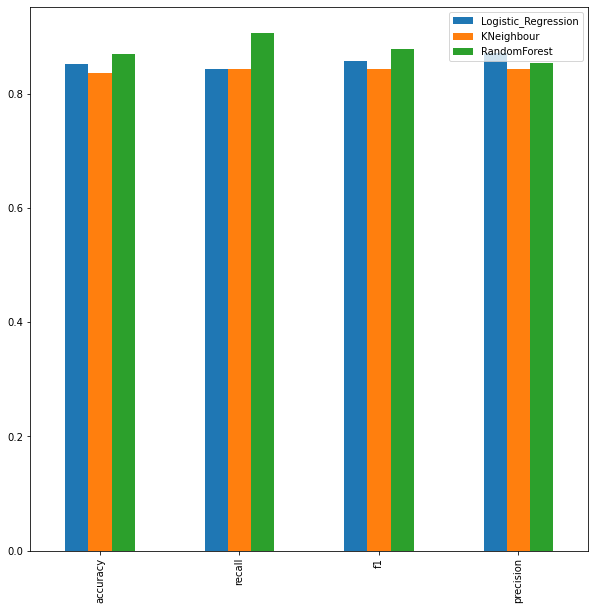

In [107]:
Performance_RandCV.plot(kind='bar',figsize=(10,10))

In [65]:
performance

,Logistic_Regression,RandomForest,KNeighbour
accuracy,0.852459,0.852459,0.918033
recall,0.843750,0.875000,0.906250
f1,0.857143,0.861538,0.920635
precision,0.870968,0.848485,0.935484


In [66]:
Performance_RandCV

,Logistic_Regression,KNeighbour,RandomForest
accuracy,0.852459,0.836066,0.868852
recall,0.843750,0.843750,0.906250
f1,0.857143,0.843750,0.878788
precision,0.870968,0.843750,0.852941


In [67]:
rfc_rand.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': True}

In [69]:
knn_rand.best_params_

{'p': 1, 'n_neighbors': 5, 'leaf_size': 6}

In [71]:
np.random.seed(42)
knn_grid=GridSearchCV(knn,param_grid=grid_knn,cv=5,verbose=2,n_jobs=-1)

In [72]:
%%time
np.random.seed(42)
knn_grid.fit(x_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Wall time: 4.94 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'p': [1, 2]},
             verbose=2)

In [73]:
knn_grid.best_params_

{'leaf_size': 1, 'n_neighbors': 5, 'p': 1}

In [74]:
eval(y_test,knn_grid)

{'accuracy': 0.8360655737704918,
 'recall': 0.84375,
 'f1': 0.84375,
 'precision': 0.84375}

In [98]:
grid={'n_estimators': [200,210,215],
 'min_samples_split': [2,3],
 'min_samples_leaf': [4,3],
 'max_features': ['sqrt'],
 'max_depth': [70,60,75],
 'bootstrap': [True]}

In [99]:
np.random.seed(42)
rfc_grid=GridSearchCV(rfc,param_grid=grid,cv=5,verbose=2,n_jobs=-1)

In [100]:
%%time
np.random.seed(42)
rfc_grid.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Wall time: 17 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [70, 60, 75],
                         'max_features': ['sqrt'], 'min_samples_leaf': [4, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [200, 210, 215]},
             verbose=2)

In [101]:
rfc_grid.best_params_

{'bootstrap': True,
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [102]:
eval(y_test,rfc_grid)

{'accuracy': 0.8524590163934426,
 'recall': 0.875,
 'f1': 0.8615384615384615,
 'precision': 0.8484848484848485}

## Using Hyperparameters Randomforest seems to be a best fit 

In [121]:
y_score=rfc_grid.predict_proba(x_test)[:,1]

In [125]:
fpr,tpr,threshold=roc_curve(y_test,y_score)

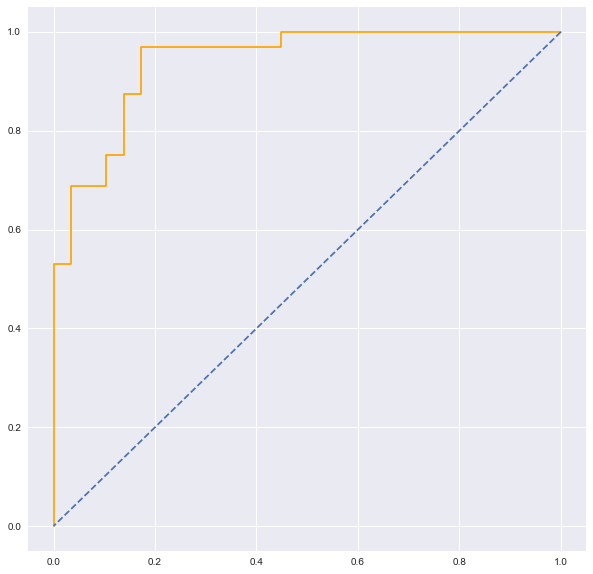

In [133]:
plt.style.use('seaborn')
fig,ax=plt.subplots(figsize=(10,10))
ax.plot(fpr,tpr,c='orange',label='Actual')
ax.plot([1,0],[1,0],label='Guessing',ls='--');

In [138]:
roc_auc_score(y_test,y_score)

0.9407327586206896

<AxesSubplot:>

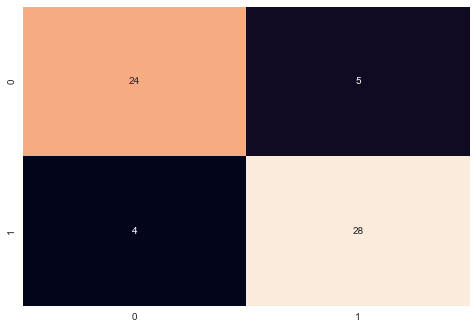

In [137]:
sns.heatmap(confusion_mat(y_test,rfc_grid),annot=True,cbar=False)

In [142]:
dump(filename='heart_disease_preds.joblib',value=rfc_grid)

['heart_disease_preds.joblib']

In [149]:
heart_model=load('heart_disease_preds.joblib')